# Алгоритмы минимизации

Продемонстрируем применение методов минимизации, решив задачу о поиске оптимального пути света в неоднородной среде, используя принцип Ферма.

## Принцип Ферма

<br>
<div style="border: 4px solid #fb7820;font-family: Gerbera, Arial;font-size: 24px;font-weight: bold; margin-bottom: 30px; padding: 30px; text-align: center;">
    <p>
        Луч света между двумя точками распространяется по тому пути, который занимает меньше всего времени.
    </p>
</div>

In [1]:
import numpy as np
import time 
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from ipywidgets import interact
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg')

## Постановка задачи

Мы рассмотрим два случая прохождения света в плоскости. В первом будем предполагать, что показатель преломления меняется только в одном направлении, а во втором будет полностью анизотропным.

Задача состоит в поиске минимального оптического пути (т.е. пути, который занимает минимальное время) между заданными точками $a$ и $b$, который определяется интергралом
$L = \int_{a}^{b} n\, dl$,
где $L$ - значение оптического пути, пройденного светом, $n$ - показатель преломления.


Для решения этой задачи мы будем аппроксимировать искомую кривую пути ломаной линией - набором отрезков. Каждый отрезок будет соединять две точки , находящиеся на расстоянии $dx$ - концы отрезков. Таким образом, значения $x_i$ этих точек фиксированы, а меняя координаты $y_i$ точек мы будем варьировать длину каждого отрезка и, соответственно, длину всего оптического пути $L$.

<table border="1" width="100%">
 <tr>
    <td width="5%" bgcolor="#1a1a1a" > 
    </td>
    <td bgcolor="#1a1a1a"><img src="path_pic.png" align="right"></td>
     <td width="5%" bgcolor="#1a1a1a" > 
    </td>
 </tr>
</table>

## Задача 1

Решим задачу о прохождении света из точки $a$ в точку $b$ в случае, когда эти точки находятся в средах с разными показателями преломления. Для этого зададим функцию распределения показателя преломления $n(x)$, которая в данном случае будет иметь следующий вид:

In [2]:
def n(x, y):
    if x > 2:
        return 2.5
    else:
        return 1.0

Зададим координаты точек $a$ и $b$ и посмотрим на распределение $n(x)$ в пространстве

In [3]:
a = [0, 0]
b = [4, 4]

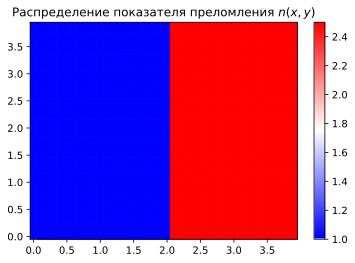

In [4]:
x = np.arange(0, 4, 0.1)
X, Y = np.meshgrid(x, x)
plt.pcolormesh(x, x, np.vectorize(n)(X, Y), edgecolor='face', cmap=plt.cm.bwr)
plt.title('Распределение показателя преломления $n(x, y)$')
plt.colorbar();

Теперь необходимо определить функцию, которая будет вычислять значение пройденного светом пути. Весь путь разобъем на $N$ отрезков.  Начальная точка пути совпадает с точкой $a$, а конечная - с точкой $b$. Для демонстрации работы алгоритма будем сохранять промежуточные решения в глобальной переменной `PATH`

In [5]:
global PATH
PATH = []

In [6]:
def ferma(y, N, a, b):
    
    x = np.linspace(a[0], b[0], N)
    y[0] = a[1]
    y[-1] = b[1]
    
    L = 0
    for i in range(1, N):
        L += np.sqrt((x[i] - x[i - 1])**2 
                   + (y[i] - y[i - 1])**2) \
                   * n((x[i] + x[i - 1]) / 2, (y[i] + y[i - 1]) / 2)
    
    PATH.append(y)
    return L

In [7]:
N = 50
y = np.random.sample(N)

In [8]:
res = minimize(ferma, y, args=(N, a, b))

In [11]:
def show_n_1d(num):
    fig, ax = plt.subplots(tight_layout=True)
    x = np.linspace(0, 4, N)
    ax.plot(x, PATH[num], color='red', ls='--', marker='o', zorder=1)
    ax.scatter(0, 0, s=100, c='k', zorder=0)
    ax.scatter(4, 4, s=100, c='k', zorder=0)
    ax.set(
        ylim=(-0.1, 4.1),
        xlim=(-0.1, 4.1)
    )
    new_x = np.arange(-1, 6)
    ax.fill_between(new_x[:new_x.size//2+1], -0.1, 5, alpha=0.2, color='orangered')
    ax.fill_between(new_x[new_x.size//2:], -0.1, 5, alpha=0.2, color='green')
#     fig.savefig(f'img/img_1d/{num}.png', dpi=256)
#     plt.close()

In [12]:
interact(show_n_1d, num=(0, len(PATH)-1));

interactive(children=(IntSlider(value=2320, description='num', max=4640), Output()), _dom_classes=('widget-int…

## Задача 2

Рассмотрим теперь случай, когда среда анизотропная, то есть показатель преломления зависит от двух направлений:

In [13]:
def n(x, y):
    return 1 + 3 * np.exp(- 2 * (2 - x)**2) * np.exp(-0.5 * y**2)

Зададим сетку в пространстве и посмотрим как выглядит распределение нашего показателя преломления:

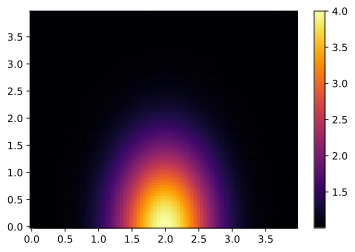

In [14]:
x = np.arange(0, 4, 0.05)
X, Y = np.meshgrid(x, x)
plt.pcolormesh(x, x, n(X, Y), cmap='inferno', edgecolor='face')
plt.colorbar();

Теперь найдем путь, по которому свет прошел из точки $(0, 0)$ в точку $(4, 0)$:

In [15]:
a = [0, 0]
b = [4, 0]

N = 50
y = np.random.sample(N)

PATH.clear() # чистим глобальную переменную
res = minimize(ferma, y, args=(N, a, b))

In [16]:
res.success

True

In [17]:
def show_n_2d(num):
    fig, ax = plt.subplots()
    x = np.arange(-0.1, 4.1, 0.1)
    mesh = np.meshgrid(x, x)
    ax.pcolormesh(x, x, n(*mesh), cmap='inferno', edgecolor='face')
    
    x = np.linspace(0, 4, N)
    ax.plot(x, PATH[num], color='red', ls='--', marker='o', zorder=1)
    ax.scatter(0, 0, s=100, c='w')
    ax.scatter(4, 0, s=100, c='w')
    ax.set(
        ylim=(-0.1, 4.1),
        xlim=(-0.1, 4.1)
    )

In [18]:
interact(show_n_2d, num=(0, len(PATH)-1));

interactive(children=(IntSlider(value=1733, description='num', max=3467), Output()), _dom_classes=('widget-int…